In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
def draw_fun(X,Y):
    x = np.linspace(1.2, 10)
    a = x*x
    b = np.log(a)
    c = np.sqrt(b)
    plt.plot(x,c)
    
    plt.plot(X,Y, 'x')
    
    d = 1/(x*np.sqrt(np.log(x**2)))
    plt.plot(x,d)
    plt.show()

In [19]:
def forward(x):
    a = x*x
    b = np.log(a)
    c = np.sqrt(b)
    return a,b,c


In [20]:
def backward(x,a,b,c,y):
    loss = c - y
    delta_c = loss
    delta_b = delta_c * 2 * np.sqrt(b)
    delta_a = delta_b * a
    delta_x = delta_a / 2 / x
    return loss, delta_x, delta_a, delta_b, delta_c


In [21]:
def update(x, delta_x):
    x = x - delta_x
    if x < 1:
        x = 1.1
    return x

how to play: 1) input x, 2) calculate c,3) input target number but not farway from c
input x as initial number(1.2, 10), you can try
3
c=1.482304
input y as target number(0.5, 2), you can try 1.8:
5
forward...
x=3.000000, a = 9.000000, b=2.197225, c=1.482304
backward...
delta_c=-3.517696, delta_b=-10.428589, delta_a=-93.857300, delta_x=-15.642883
forward...
x=18.642883, a = 347.557101, b=5.850929, c=2.418869
backward...
delta_c=-2.581131, delta_b=-12.486836, delta_a=-4339.888391, delta_x=-116.395310
forward...
x=135.038194, a = 18235.313747, b=9.811115, c=3.132270
backward...
delta_c=-1.867730, delta_b=-11.700469, delta_a=-213361.728889, delta_x=-790.005120
forward...
x=925.043314, a = 855705.132939, b=13.659681, c=3.695901
backward...
delta_c=-1.304099, delta_b=-9.639644, delta_a=-8248692.497618, delta_x=-4458.543925
forward...
x=5383.587240, a = 28983011.565755, b=17.182220, c=4.145144
backward...
delta_c=-0.854856, delta_b=-7.087001, delta_a=-205402636.200759, delta_x=-19076.744470


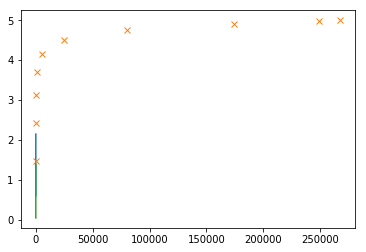

In [22]:
if __name__ == '__main__':
    print("how to play: 1) input x, 2) calculate c,3) input target number but not farway from c")
    print("input x as initial number(1.2, 10), you can try")
    
    line = input()
    x = float(line)
    
    a,b,c = forward(x)
    print("c=%f" %c)
    print("input y as target number(0.5, 2), you can try 1.8:")
    line = input()
    y = float(line)
    
    error = 1e-3
    
    X, Y = [], []
    
    for i in range(20):
        print("forward...")
        a,b,c = forward(x)
        print("x=%f, a = %f, b=%f, c=%f" %(x,a,b,c))
        
        X.append(x)
        Y.append(c)
        
        #backward
        print("backward...")
        loss, delta_x, delta_a, delta_b, delta_c = backward(x,a,b,c,y)
        
        
        if abs(loss) < error:
            print("done!")
            break
        
        # update x
        x = update(x, delta_x)
        print("delta_c=%f, delta_b=%f, delta_a=%f, delta_x=%f" %(delta_c, delta_b, delta_a, delta_x))
        
    draw_fun(X,Y)
        
        